In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io

In [26]:
df=pd.read_csv('heart.csv')
print(df)

df.isnull().sum() #checking for null values

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean of each column

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'thalachh']] = scaler.fit_transform(df[['age', 'thalachh']])

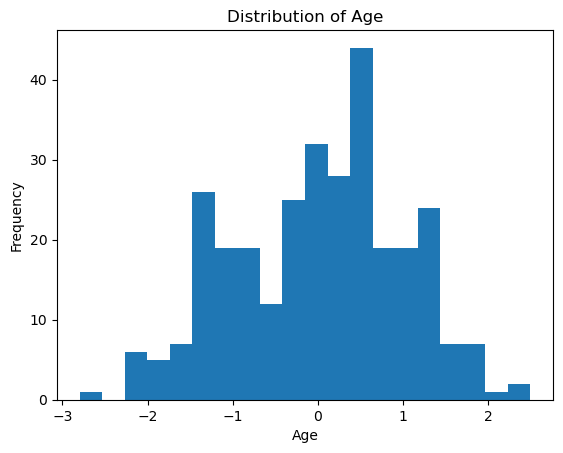

In [29]:
#fitting the data into model..

plt.hist(df['age'], bins=20)
plt.xlabel('Age')                   
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()            
#graphical representation of Age & frequency

In [30]:
X = df.drop('output', axis=1)  # Features 
y = df['output']  # Target variable 

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier() #ML model
model.fit(X, y) #fit the data

ExtraTreesClassifier()

In [31]:
# Print feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

# Select top k features (e.g., top 5 features)
k = 5

caa         0.130200
cp          0.127823
thall       0.107727
exng        0.100300
thalachh    0.083949
oldpeak     0.079808
age         0.074720
slp         0.069031
trtbps      0.058745
chol        0.056351
sex         0.054250
restecg     0.037238
fbs         0.019857
dtype: float64


In [32]:
selected_features = feature_importances.index[:k].tolist()
print(selected_features)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

['caa', 'cp', 'thall', 'exng', 'thalachh']


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model ------- measuring the accuracy,etc.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

/Users/jyothirayani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print("Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Logistic Regression:
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571


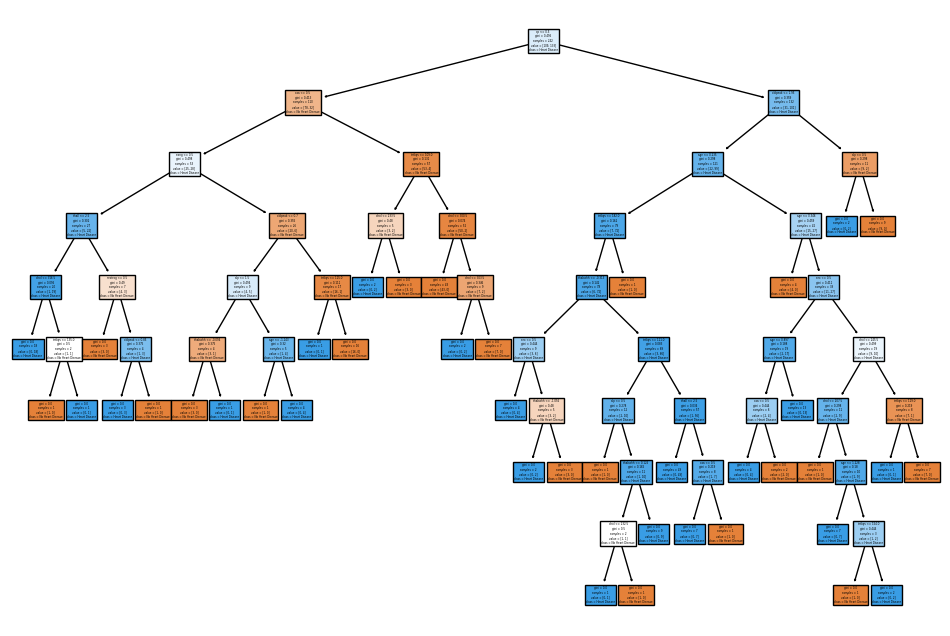

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train the Decision Tree model
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=X.columns, class_names=['No Heart Disease, 'Heart Disease'], filled=True)
plt.show()